In [1]:
# Testing different CHIANTI database files with the sunxspex thermal model
# 
# 05-Jun-2023 IGH
# 06-Jun-2023 Went back and fixed output from sswidl to avoid chianti_version issues
# 11-Jul-2023 Now with CHIANTI v10.1 (dbase ver, 10.2 idl ver)

In [2]:
import numpy as np
from astropy import units as u
import matplotlib
import matplotlib.pyplot as plt

from sunxspex import thermal

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
            'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [3]:
# generate some energy edges
engs=np.arange(1.01,21,0.01)

In [4]:
# Generate some thermal models for 1e49 and 10, 20MK
# Uses older/default v7.1 CHIANTI save files from sswidl
f10=thermal.thermal_emission(engs << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20=thermal.thermal_emission(engs << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

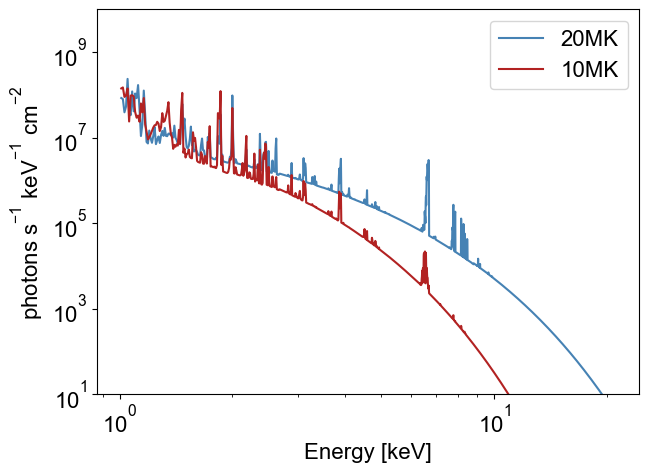

In [5]:
matplotlib.rcParams['font.size']=16
fig, ax= plt.subplots(1,figsize=(7,5))
ax.plot(engs[:-1],f20.value,label='20MK',color='steelblue')
ax.plot(engs[:-1],f10.value,label='10MK',color='firebrick')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim([1e1,1e10])
ax.set_ylabel('$photons\;s^{-1}\;keV^{-1}\;cm^{-2}$')
ax.set_xlabel('Energy [keV]')
plt.legend()
plt.show()

In [6]:
# Try it with my new generated
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters('../idl/chianti_cont_1_250_unity_v1002_t41.sav')
thermal.LINE_GRID=thermal.setup_line_parameters('../idl/chianti_lines_1_12_unity_v1002_t41.sav')
f10_v10=thermal.thermal_emission(engs << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20_v10=thermal.thermal_emission(engs << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

# Try it with my new generated
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters('../idl/chianti_cont_1_250_unity_v101_t41.sav')
thermal.LINE_GRID=thermal.setup_line_parameters('../idl/chianti_lines_1_12_unity_v101_t41.sav')
f10_v101=thermal.thermal_emission(engs << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20_v101=thermal.thermal_emission(engs << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

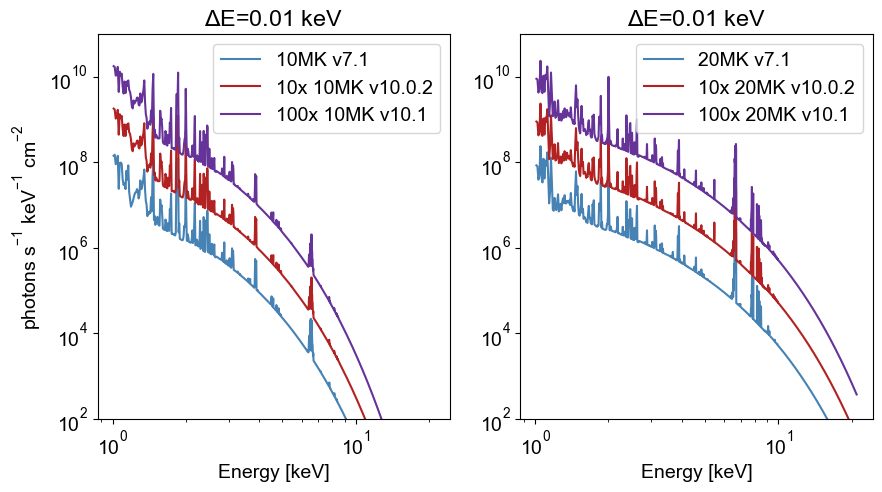

In [7]:
matplotlib.rcParams['font.size']=14
fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs[:-1],f10.value,label='10MK v7.1',color='steelblue')
axs[0].plot(engs[:-1],f10_v10.value*10,label='10x 10MK v10.0.2',color='firebrick')
axs[0].plot(engs[:-1],f10_v101.value*100,label='100x 10MK v10.1',color='rebeccapurple')

axs[1].plot(engs[:-1],f20.value,label='20MK v7.1',color='steelblue')
axs[1].plot(engs[:-1],f20_v10.value*10,label='10x 20MK v10.0.2',color='firebrick')
axs[1].plot(engs[:-1],f20_v101.value*100,label='100x 20MK v10.1',color='rebeccapurple')
axs[0].set_ylabel('$photons\;s^{-1}\;keV^{-1}\;cm^{-2}$')

for ax in axs:
    ax.set_title('$\Delta$E=0.01 keV')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1e2,1e11])
    ax.set_xlabel('Energy [keV]')
    ax.legend()
plt.show()

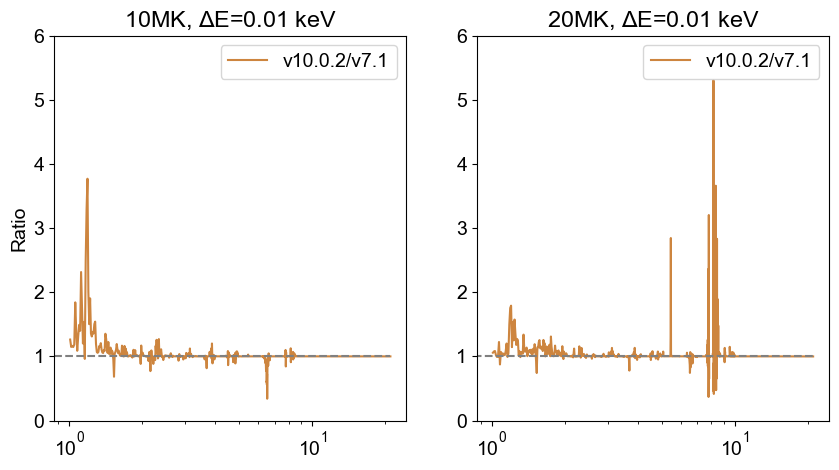

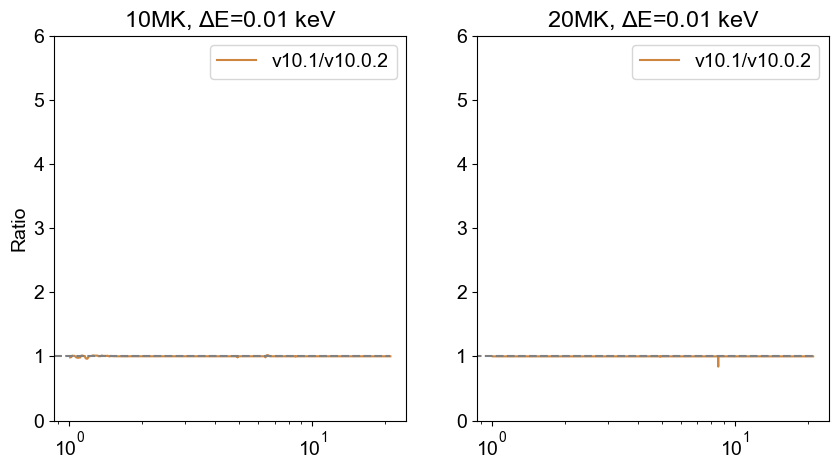

In [8]:
fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs[:-1],f10_v10.value/f10.value,label='v10.0.2/v7.1',color='peru')
axs[1].plot(engs[:-1],f20_v10.value/f20.value,label='v10.0.2/v7.1',color='peru')
axs[0].set_ylabel('Ratio')
axs[0].set_title('10MK, $\Delta$E=0.01 keV')
axs[1].set_title('20MK, $\Delta$E=0.01 keV')
axs[0].set_ylabel('Ratio')
for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim([0,6])
    ax.legend()
    ax.plot([0,np.max(engs[:-1])],[1,1],'--',color='grey')
plt.show()


fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs[:-1],f10_v101.value/f10_v10.value,label='v10.1/v10.0.2',color='peru')
axs[1].plot(engs[:-1],f20_v101.value/f20_v10.value,label='v10.1/v10.0.2',color='peru')
axs[0].set_ylabel('Ratio')
axs[0].set_title('10MK, $\Delta$E=0.01 keV')
axs[1].set_title('20MK, $\Delta$E=0.01 keV')
axs[0].set_ylabel('Ratio')
for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim([0,6])
    ax.legend()
    ax.plot([0,np.max(engs[:-1])],[1,1],'--',color='grey')
plt.show()

In [9]:
# Redo but with bigger energy bins
engs25=np.arange(1.25,21,0.25)

In [10]:
# Do for the v10.1 version
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters('../idl/chianti_cont_1_250_unity_v101_t41.sav')
thermal.LINE_GRID=thermal.setup_line_parameters('../idl/chianti_lines_1_12_unity_v101_t41.sav')
f10_v101_25=thermal.thermal_emission(engs25 << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20_v101_25=thermal.thermal_emission(engs25 << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

# Do for the v10.0.2 version
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters('../idl/chianti_cont_1_250_unity_v1002_t41.sav')
thermal.LINE_GRID=thermal.setup_line_parameters('../idl/chianti_lines_1_12_unity_v1002_t41.sav')
f10_v10_25=thermal.thermal_emission(engs25 << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20_v10_25=thermal.thermal_emission(engs25 << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))

# Do for the v7.1 default version (though need to reset the )
chdir='/usr/local/ssw/packages/xray/dbase/chianti/'
thermal.CONTINUUM_GRID=thermal.setup_continuum_parameters(chdir+'chianti_cont_1_250_v71.sav')
thermal.LINE_GRID=thermal.setup_line_parameters(chdir+'chianti_lines_1_10_v71.sav')
f10_25=thermal.thermal_emission(engs25 << u.keV,10*1e6<<u.K,1e49<< u.cm**(-3))
f20_25=thermal.thermal_emission(engs25 << u.keV,20*1e6<<u.K,1e49<< u.cm**(-3))


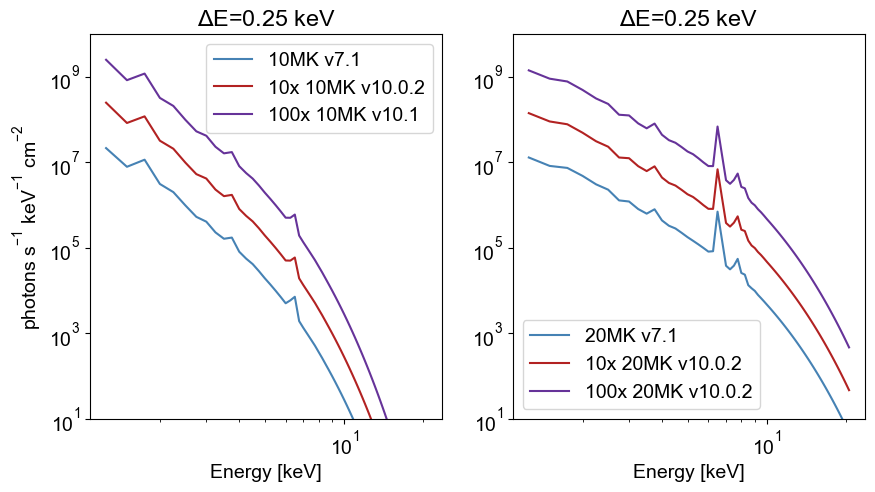

In [11]:
matplotlib.rcParams['font.size']=14
fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs25[:-1],f10_25.value,label='10MK v7.1',color='steelblue')
axs[0].plot(engs25[:-1],f10_v10_25.value*10,label='10x 10MK v10.0.2',color='firebrick')
axs[0].plot(engs25[:-1],f10_v101_25.value*100,label='100x 10MK v10.1',color='rebeccapurple')

axs[1].plot(engs25[:-1],f20_25.value,label='20MK v7.1',color='steelblue')
axs[1].plot(engs25[:-1],f20_v10_25.value*10,label='10x 20MK v10.0.2',color='firebrick')
axs[1].plot(engs25[:-1],f20_v101_25.value*100,label='100x 20MK v10.0.2',color='rebeccapurple')
axs[0].set_ylabel('$photons\;s^{-1}\;keV^{-1}\;cm^{-2}$')

for ax in axs:
    ax.set_title('$\Delta$E=0.25 keV')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim([1e1,1e10])
    ax.set_xlabel('Energy [keV]')
    ax.legend()
plt.show()

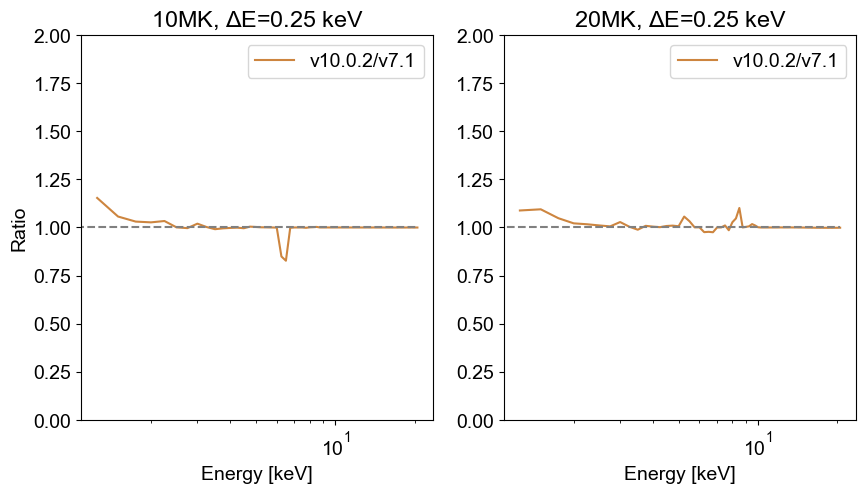

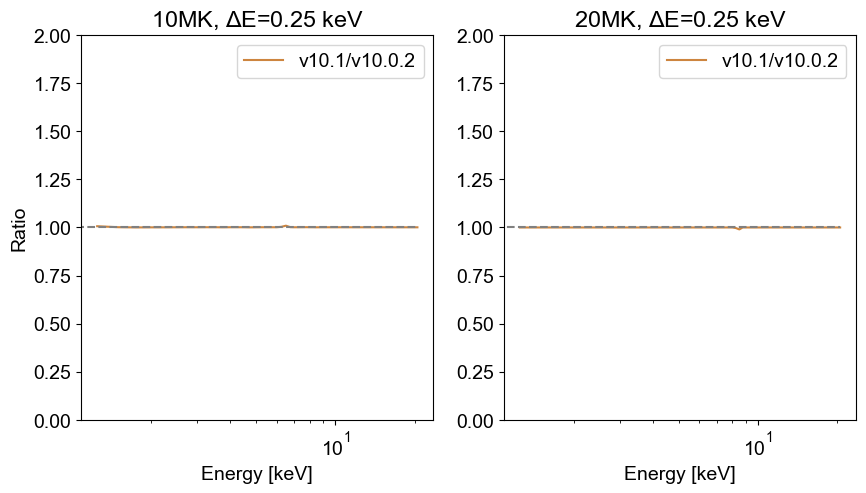

In [12]:
fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs25[:-1],f10_v10_25.value/f10_25.value,label='v10.0.2/v7.1',color='peru')
axs[1].plot(engs25[:-1],f20_v10_25.value/f20_25.value,label='v10.0.2/v7.1',color='peru')
axs[0].set_ylabel('Ratio')
axs[0].set_title('10MK, $\Delta$E=0.25 keV')
axs[1].set_title('20MK, $\Delta$E=0.25 keV')
for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim([0,2])
    ax.plot([0,np.max(engs25[:-1])],[1,1],'--',color='grey')
    ax.set_xlabel('Energy [keV]')
    ax.legend()
plt.show()

fig, axs= plt.subplots(1,2,figsize=(10,5))
axs[0].plot(engs25[:-1],f10_v101_25.value/f10_v10_25.value,label='v10.1/v10.0.2',color='peru')
axs[1].plot(engs25[:-1],f20_v101_25.value/f20_v10_25.value,label='v10.1/v10.0.2',color='peru')
axs[0].set_ylabel('Ratio')
axs[0].set_title('10MK, $\Delta$E=0.25 keV')
axs[1].set_title('20MK, $\Delta$E=0.25 keV')
for ax in axs:
    ax.set_xscale('log')
    ax.set_ylim([0,2])
    ax.plot([0,np.max(engs25[:-1])],[1,1],'--',color='grey')
    ax.set_xlabel('Energy [keV]')
    ax.legend()
plt.show()